# [Going Deeper with Convolutions](https://arxiv.org/abs/1409.4842)

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D)
from tensorflow.keras.layers import concatenate
from tensorflow.keras.utils import plot_model

In [11]:
def inception_module(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out):
    conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
    
    conv3 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in)
    conv3 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv3)
    
    conv5 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in)
    conv5 = Conv2D(f3_out, (5,5), padding='same', activation='relu')(conv5)
    
    pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
    pool = Conv2D(f4_out, (5,5), padding='same', activation='relu')(pool) 
    
    layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
    return layer_out

In [12]:
visible = Input(shape=(256,256,3))
layer = inception_module(visible, 64, 96, 128, 16, 32, 32)
layer = inception_module(layer, 128, 128, 192, 32, 96, 64)

model = Model(inputs=visible, outputs=layer)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 256, 256, 96) 384         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 256, 256, 16) 64          input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 256, 256, 3)  0           input_3[0][0]                    
____________________________________________________________________________________________

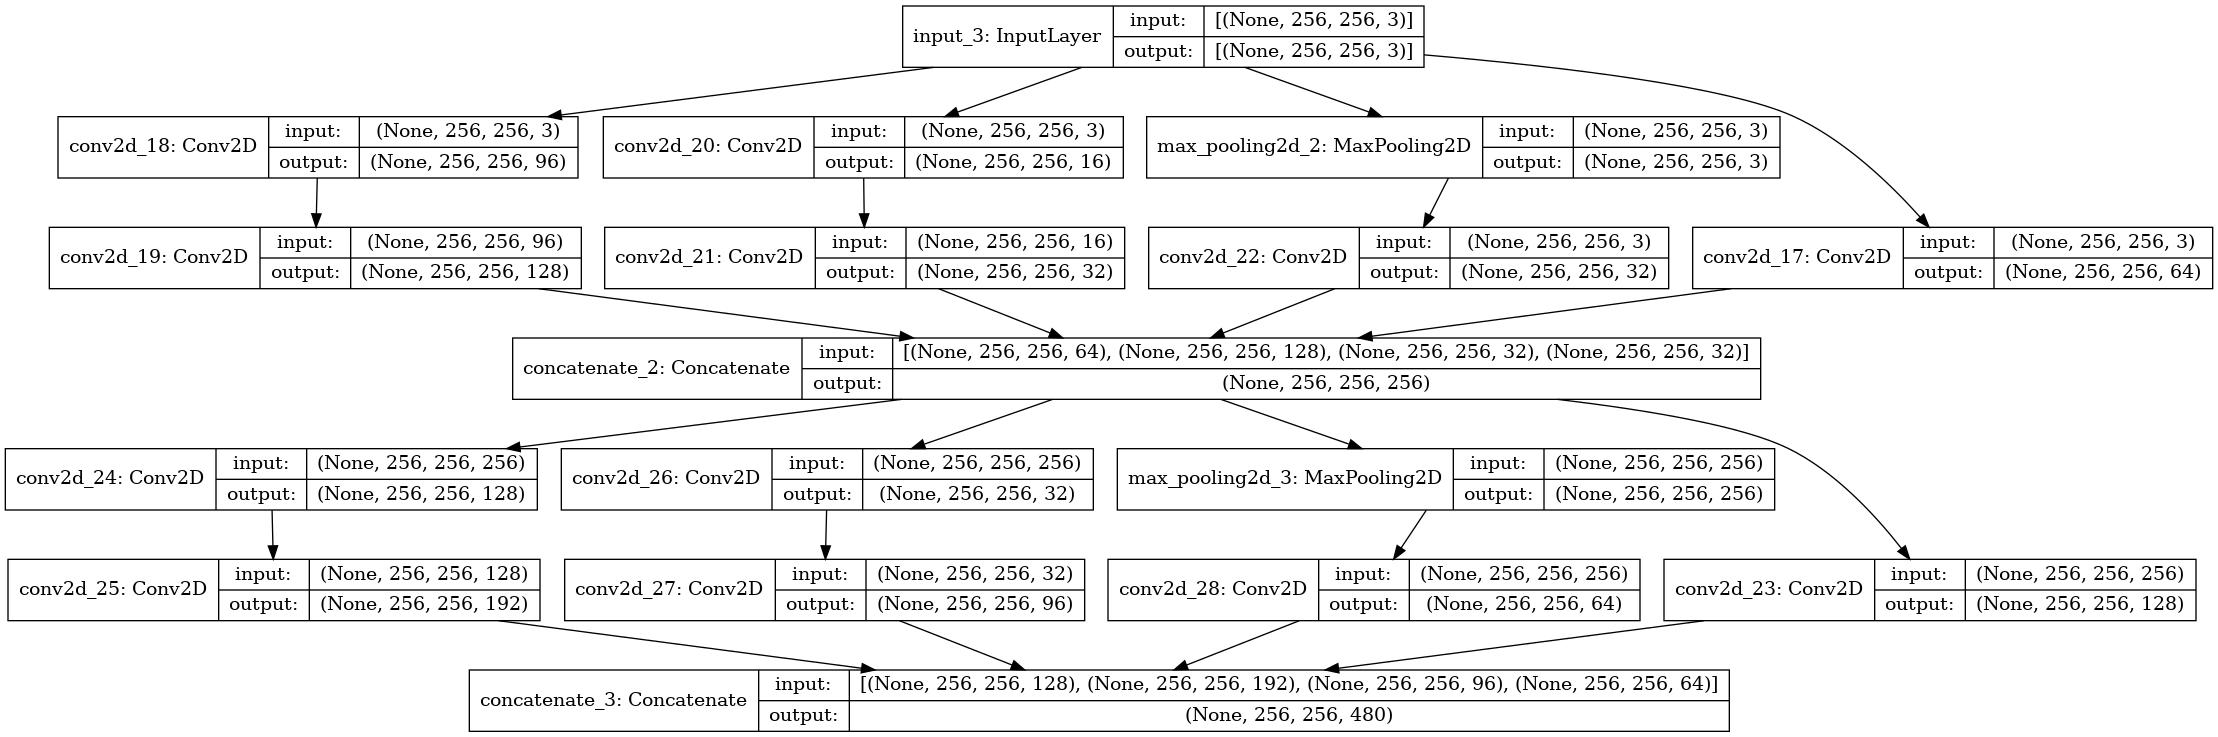

In [13]:
plot_model(model, show_shapes=True, to_file='inception_module.jpg')